In [2]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [10]:
# Importing data
# Column names: Time (s), Temperature (C),Temperature Error (C), DAC Voltage (%)

part1_max = np.loadtxt('data/4.1-max_temp.csv', delimiter=',', skiprows=1)
part1_min = np.loadtxt('data/4.1-min_temp.csv', delimiter=',', skiprows=1)

part1_alter = np.loadtxt('data/4.1-reaching5.csv', delimiter=',', skiprows=1)


#Varying Band Parameters csv
part2_band = np.loadtxt('data/4.2-modifying_band.csv', delimiter=',', skiprows=1)
#(-4095, 0) redesign of heating block
part2_osc1 = np.loadtxt('data/4.2-oscillation-1.csv', delimiter=',', skiprows=1)
#(-4095, 4095) redesign of heating block
part2_osc2 = np.loadtxt('data/4.2-oscillation-2.csv', delimiter=',', skiprows=1)


# 4.1: Open Loop Control

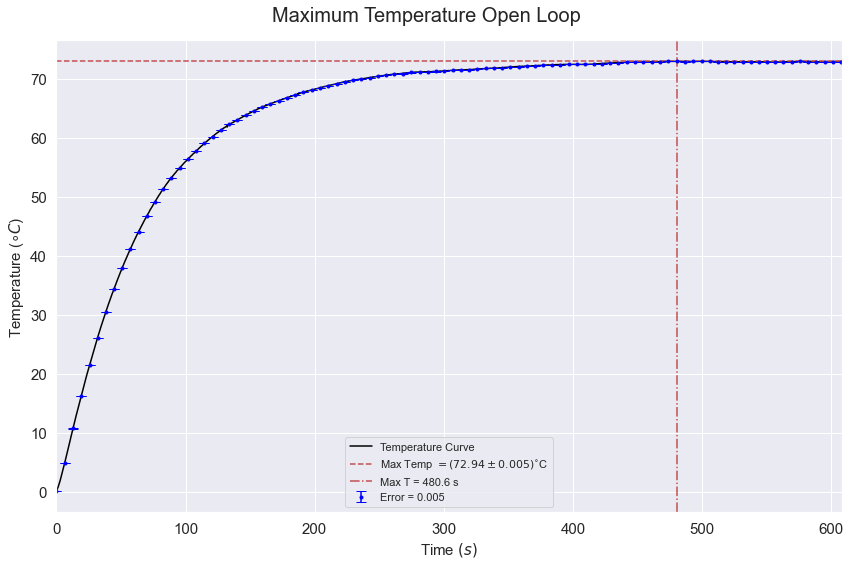

In [4]:
#Maxmimum Temperature Plot
plt.figure(figsize = (12,8))

#Offsetting Data to begin at 0
min_x = np.min(part1_max[:,0])
max_x = np.max(part1_max[:,0]) - min_x

#Plotting Data
plt.plot(part1_max[:,0] - min_x, part1_max[:,1], color = "black", label = "Temperature Curve") #temp

#Finding Maximum Temperature and Corresponding Time Value
max_temp = max(part1_max[:,1])
corr_x = part1_max[:,0][part1_max[:,1].argmax()]
corr_x2 = (corr_x - min_x)

#For Error Bars, only plotting every 25th point (easier visualization)
x_data = part1_max[::25, 0] - min_x
y_data = part1_max[::25, 1]

#Plot specifications
plt.xlabel(r"Time $(s)$", size = 15)
plt.ylabel(r"Temperature ($\circ C$)", size = 15)
plt.suptitle("Maximum Temperature Open Loop", size = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.xlim(0, max_x)
plt.axhline(max_temp, color='r', linestyle='--', label=r"Max Temp $ = (72.94 \pm 0.005)^{\circ}$C")
plt.axvline(corr_x2, color='r', linestyle='-.', label = r"Max T = 480.6 s")
plt.errorbar(x_data, y_data, yerr=0.005, fmt='o', color = "blue", markersize=3, capsize=5, label = "Error = 0.005")
plt.tight_layout()
plt.legend(loc = "best")
plt.show()

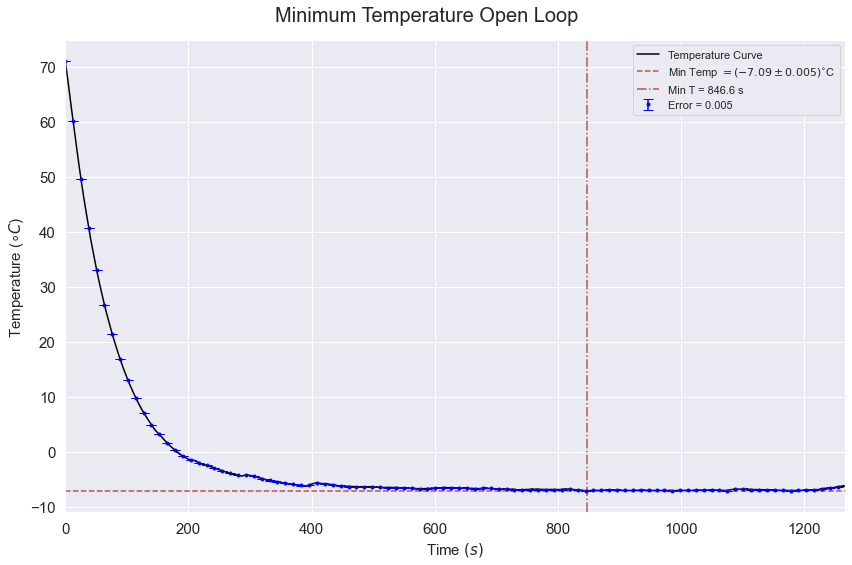

In [5]:
#Minimum Temperature Plot
plt.figure(figsize = (12,8))

#Offsetting Data to begin at 0
min_x = np.min(part1_min[:,0])
max_x = np.max(part1_min[:,0]) - min_x

#Plotting Data
plt.plot(part1_min[:,0] - min_x, part1_min[:,1], color = "black", label = "Temperature Curve") #temp

#Finding Maximum Temperature and Corresponding Time
min_temp = min(part1_min[:,1])
corr_x = part1_min[:,0][part1_min[:,1].argmin()]
corr_x2 = (corr_x - min_x)

#For Error Bars, only plotting every 50th point (easier visualization)
#More spacing in this instance because many more points were taken
x_data = part1_min[::50, 0] - min_x
y_data = part1_min[::50, 1]

#Plot specifications
plt.xlabel(r"Time $(s)$", size = 15)
plt.ylabel(r"Temperature ($\circ C$)", size = 15)
plt.suptitle("Minimum Temperature Open Loop", size = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.axhline(min_temp, color='r', linestyle='--', label=r"Min Temp $ = (-7.09 \pm 0.005)^{\circ}$C")
plt.axvline(corr_x2, color='r', linestyle='-.', label = r"Min T = 846.6 s ")
plt.errorbar(x_data, y_data, yerr=0.005, fmt='o', color = "blue", markersize=3, capsize=5, label = "Error = 0.005")
plt.xlim(0, max_x)
plt.tight_layout()
plt.legend(loc="best")
plt.show()

[Temperature, DAC]:  [-5.016, -51.4041514]
[Temperature, Voltage (V)]:  [-5.016, -2.57020757]


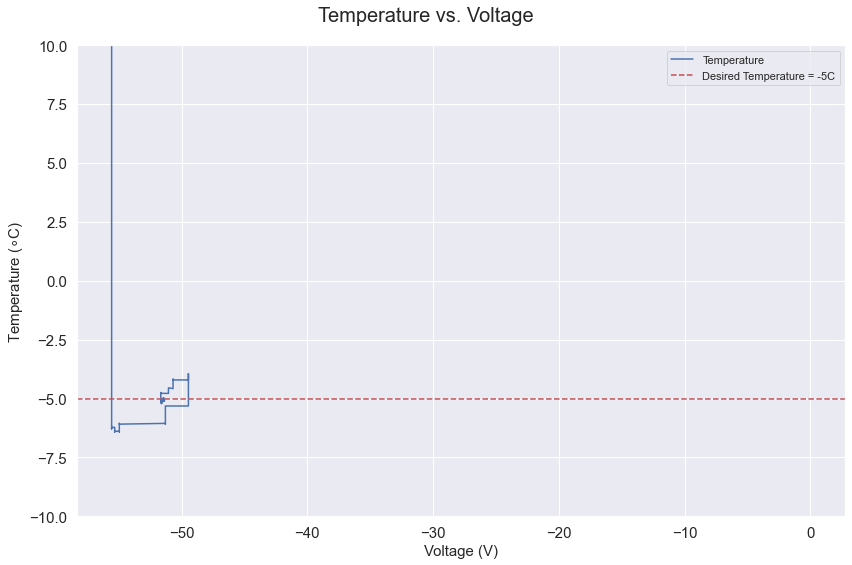

In [57]:
#Finding -5C
#Plotting Voltage vs. Temperature
plt.figure(figsize=(12,8))

DAC_voltages = part1_alter[:,3]

#Initialize an empty array to store the converted voltages
voltages = []

#Iterate through each element of the dac_values array
for i in range(len(DAC_voltages)):
    #Apply the formula to calculate the voltage
    voltage = (DAC_voltages[i] * 5 * 100) / 4095
    #Append the result to the voltages array
    voltages.append(voltage)

#Print the resulting voltages array
#print(voltages)

#Plotting Temperature vs. Voltage
plt.plot(part1_alter[:,3], part1_alter[:,1], label="Temperature")

#Find the row with the closest temperature to -5C
target_temp = -5
temp_diffs = np.abs(part1_alter[:, 1] - target_temp)
closest_temp_index = np.argmin(temp_diffs)
#print('stable index: ', closest_temp_index)
#print(DAC_voltages[859])

# ALTERNATIVE
# LOOKING AT DATA WE SEE THAT IT STABILISES AT 8146, no need to have data past 8175 since I was
# just trying to get better results
DAC_voltages_prime = part1_alter[:8175,3]
print('[Temperature, DAC]: ', [part1_alter[8146,1] , DAC_voltages_prime[8146]])
print('[Temperature, Voltage (V)]: ', [part1_alter[8146,1] , DAC_voltages_prime[8146]*5/100])

#Get the corresponding DAC voltage value and convert to voltage
dac_value = part1_alter[closest_temp_index, 2]
vol = (dac_value*5*100)/4095

#print(f"The DAC voltage value when T = -5C is {vol:.3f} V")


#Plot specifications
plt.xlabel("Voltage (V)", size=15)
plt.ylabel("Temperature ($\circ$C)", size=15)
plt.suptitle("Temperature vs. Voltage", size=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
#Plotting desired temperature line
plt.axhline(y=-5, color='r', linestyle='--', label="Desired Temperature = -5C")
plt.ylim(-10,10)
plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [24]:
#with np.printoptions(threshold=np.inf):
    #print(part1_alter[:,3])


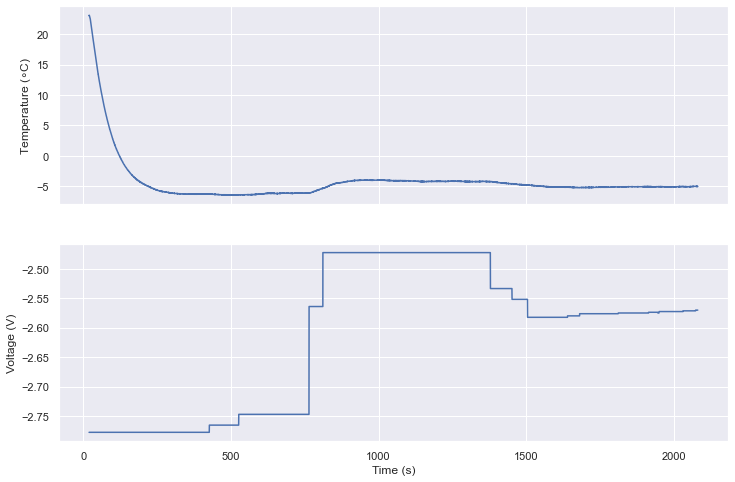

In [55]:
fig, axs = plt.subplots(2, figsize=(12, 8), sharex=True)
axs[0].plot(part1_alter[72:8146,0], part1_alter[72:8146,1])
axs[0].set_ylabel("Temperature ($\circ$C)")
axs[1].plot(part1_alter[72:8146,0], part1_alter[72:8146,3]*5 / 100)
axs[1].set_ylabel("Voltage (V)")
plt.xlabel("Time (s)")
plt.show()

# 4.2: On-Off Control

In [85]:
print(part2_band[:,1])

[ 2.94   3.243  3.31  ... -4.479 -4.546 -4.613]


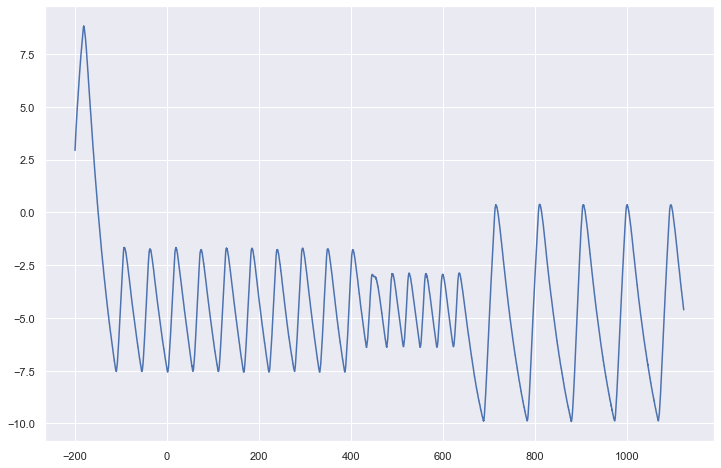

In [83]:
plt.figure(figsize = (12,8))
plt.plot(part2_band[:,0] - min_x, part2_band[:,1])
plt.show()

Default Band Length: 5179
200.268
633.268
886.868
Last point of small band plot: [825.468  -6.122  -1.122   0.   ]


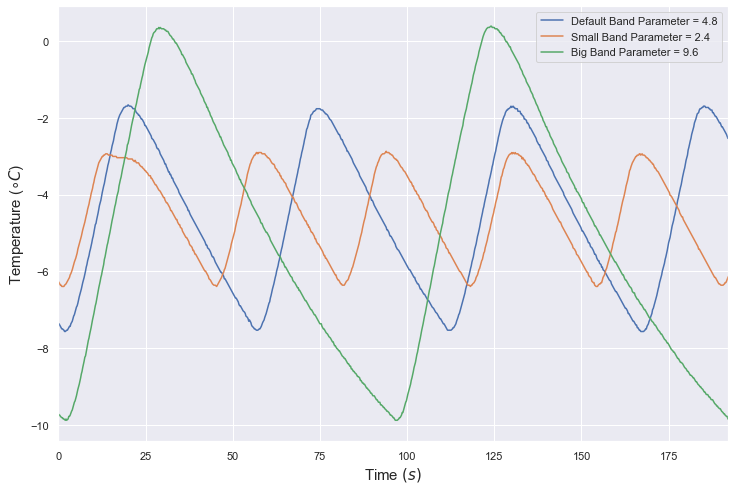

In [80]:
#Varying Band Parameter Plot
plt.figure(figsize = (12,8))

#Truncating Data to Fit on the Same Plot
print("Default Band Length:", len(part2_band))

#First Band Parameter = 4.8
default_band = part2_band[775:1855]
small_band = part2_band[2465:3220]
big_band = part2_band[3460:]

#Offsetting Data
min_x = np.min(default_band[:,0])
print(min_x)
min_x2 = np.min(small_band[:,0])
print(min_x2)
min_x3 = np.min(big_band[:,0])
print(min_x3)

#Plotting Band Variation
#plt.plot(part2_band[:,0] - min_x, part2_band[:,1])
plt.plot(default_band[:,0] - min_x, default_band[:,1], label = "Default Band Parameter = 4.8")
plt.plot(small_band[:,0] - min_x2, small_band[:,1], label = "Small Band Parameter = 2.4")
plt.plot(big_band[:,0] - min_x3, big_band[:,1], label = "Big Band Parameter = 9.6")

last_point = small_band[-1]
print("Last point of small band plot:", last_point)

plt.xlabel(r"Time $(s)$", size = 15)
plt.ylabel(r"Temperature ($\circ C$)", size = 15)
plt.xlim([0,192])
plt.legend(loc="best")
plt.show()

In [88]:
# extract the time and temperature data for big_band
big_time = big_band[:,0] - min_x3
big_temp = big_band[:,1]

# find the peaks in the temperature data using find_peaks()
from scipy.signal import find_peaks
big_peaks, _ = find_peaks(big_temp, prominence=5)

# filter peaks based on their time values
big_peaks = big_peaks[(big_time[big_peaks] >= 0) & (big_time[big_peaks] <= 192)]

# calculate the period of the oscillation
big_period = np.mean(np.diff(big_time[big_peaks]))

# calculate the amplitude of the oscillation
big_amplitude = np.max(big_temp[big_peaks]) - np.min(big_temp[big_peaks])

print("Period of oscillation in big_band:", big_period, "s")
print("Amplitude of oscillation in big_band:", big_amplitude, "\N{DEGREE SIGN}C")


Period of oscillation in big_band: 47.60000000000002 s
Amplitude of oscillation in big_band: 0.03300000000000003 °C


In [8]:
print(part2_osc1)

[[1994.868   42.49     2.49     0.   ]
 [1995.068   42.456    2.456    0.   ]
 [1995.468   42.388    2.388    0.   ]
 ...
 [2292.468   44.19     4.19     0.   ]
 [2292.668   44.259    4.259    0.   ]
 [2292.868   44.327    4.327    0.   ]]


In [9]:
print(part2_osc2)

[[  0.868  48.718  24.218   0.   ]
 [  1.068  48.786  24.286   0.   ]
 [  1.468  48.855  24.355   0.   ]
 ...
 [336.668  36.714  -3.286 100.   ]
 [336.868  36.714  -3.286 100.   ]
 [337.268  36.782  -3.218 100.   ]]


1994.868


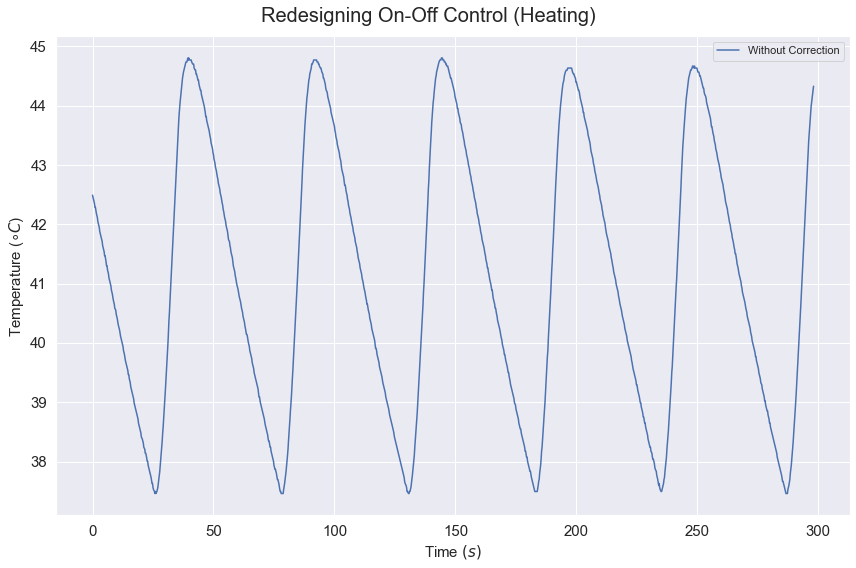

In [113]:
plt.figure(figsize = (12,8))

#Offsetting Data
min_osc= np.min(part2_osc1[:,0])
print(min_osc)

#Plotting Heat Correction
plt.plot(part2_osc1[:,0] - min_osc, part2_osc1[:,1], label = "Without Correction")

plt.xlabel(r"Time $(s)$", size = 15)
plt.ylabel(r"Temperature ($\circ C$)", size = 15)
plt.suptitle("Redesigning On-Off Control (Heating)", size = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.tight_layout()
plt.legend()
plt.show()

0.868


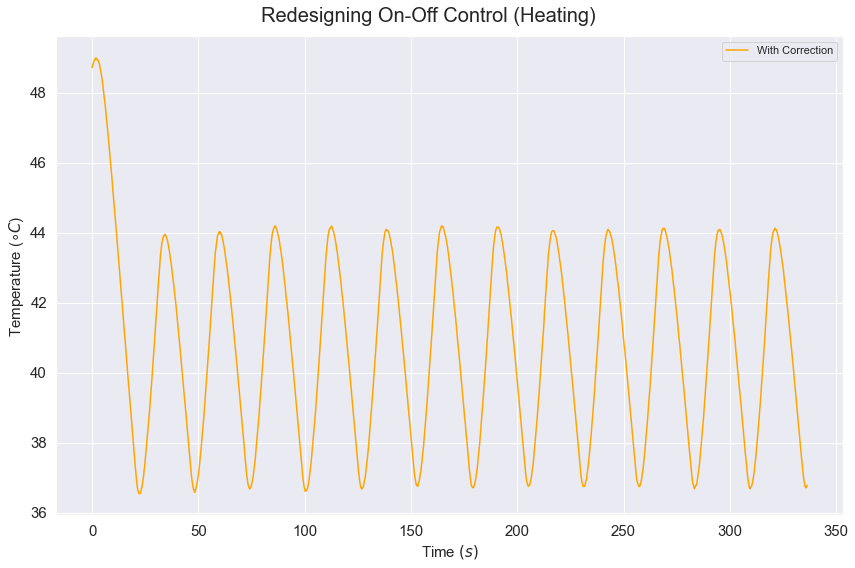

In [114]:
plt.figure(figsize = (12,8))

#Offsetting Data
min_osc= np.min(part2_osc2[:,0])
print(min_osc)

#Plotting Heat Correction
plt.plot(part2_osc2[:,0] - min_osc, part2_osc2[:,1], color = "orange", label = "With Correction")

plt.xlabel(r"Time $(s)$", size = 15)
plt.ylabel(r"Temperature ($\circ C$)", size = 15)
plt.suptitle("Redesigning On-Off Control (Heating)", size = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.tight_layout()
plt.legend()
plt.show()